In [2]:
import geopandas as gpd
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
import textwrap
import requests
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from shapely.ops import cascaded_union

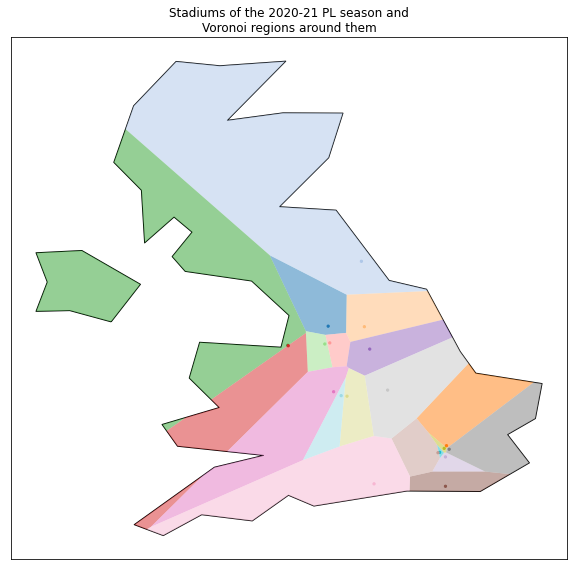

In [3]:
def premStadiumsVoronoi():
    gpd.options.display_precision = 9
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    fin = open("../Data/Stadiums_Data/PL_202021.pickle", "rb")
    stadiums = pickle.load(fin)
    fin.close()

    uk = world[world["name"] == "United Kingdom"]
    uk = uk.to_crs(epsg=4326)
    stadiums = stadiums.to_crs(uk.crs)

    uk_boundary = uk["geometry"].iloc[0]
    stadiums = stadiums[stadiums["geometry"].within(uk_boundary)]

    stadiums_coords = points_to_coords(stadiums["geometry"])

    poly_shapes, _, poly_to_pt_assignments = voronoi_regions_from_coords(
        stadiums_coords, uk_boundary
    )

    fig, ax = subplot_for_map(figsize=[12.8, 9.6])
    plot_voronoi_polys_with_points_in_area(
        ax, uk_boundary, poly_shapes, stadiums_coords, poly_to_pt_assignments
    )
    title = "Stadiums of the 2020-21 PL season and Voronoi regions around them"
    ax.set_title(textwrap.fill(title, 40))
    plt.show()


premStadiumsVoronoi()

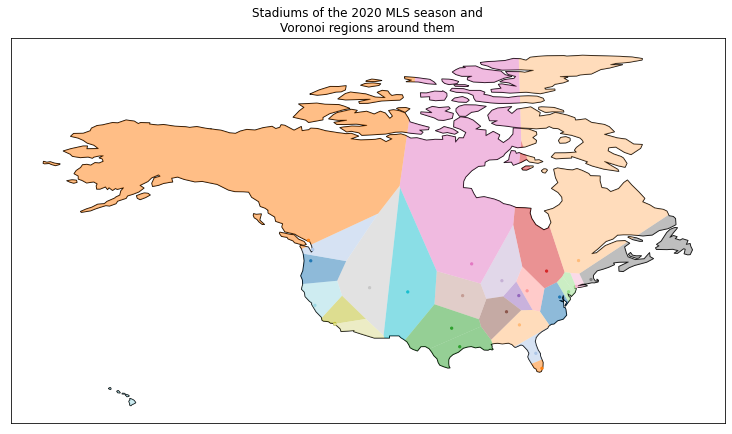

In [62]:
def mlsStadiumsVoronoi():
    gpd.options.display_precision = 9
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    fin = open("../Data/Stadiums_Data/MLS_2020.pickle", "rb")
    stadiums = pickle.load(fin)
    fin.close()

    usa_and_canada = world[
        (world["name"] == "United States of America") | (world["name"] == "Canada")
    ]
    usa_and_canada = usa_and_canada.to_crs(epsg=4326)
    usa_and_canada_boundary = cascaded_union(usa_and_canada["geometry"])
    stadiums = stadiums.to_crs(usa_and_canada.crs)
    stadiums = stadiums[stadiums["geometry"].within(usa_and_canada_boundary)]

    stadiums_coords = points_to_coords(stadiums["geometry"])

    poly_shapes, _, poly_to_pt_assignments = voronoi_regions_from_coords(
        stadiums_coords, usa_and_canada_boundary
    )

    fig, ax = subplot_for_map(figsize=[12.8, 9.6])
    plot_voronoi_polys_with_points_in_area(
        ax,
        usa_and_canada_boundary,
        poly_shapes,
        stadiums_coords,
        poly_to_pt_assignments,
    )
    title = "Stadiums of the 2020 MLS season and Voronoi regions around them"
    ax.set_title(textwrap.fill(title, 40))
    plt.show()


mlsStadiumsVoronoi()

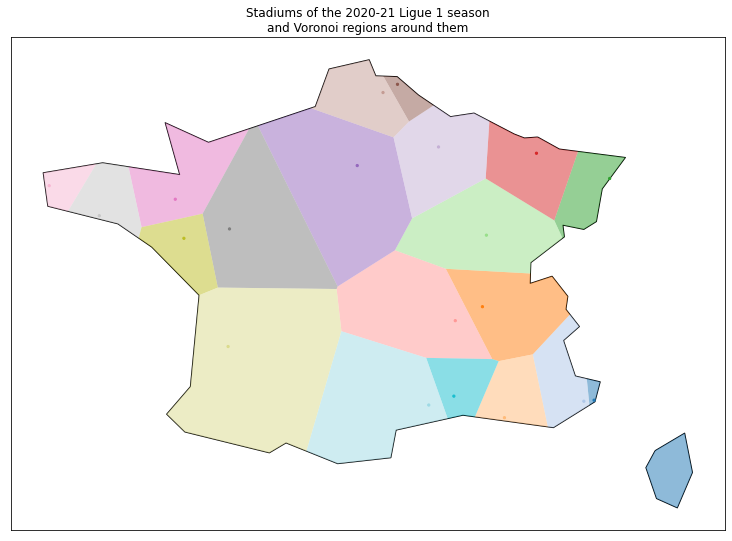

In [55]:
def ligue1StadiumsVoronoi():
    gpd.options.display_precision = 9
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    fin = open("../Data/Stadiums_Data/Ligue_1_202021.pickle", "rb")
    stadiums = pickle.load(fin)
    fin.close()

    france_and_monaco = world[(world["name"] == "France") | (world["name"] == "Monaco")]
    france_and_monaco = france_and_monaco.to_crs(epsg=4326)
    france_and_monaco_boundary = france_and_monaco["geometry"].iloc[0][1:]
    stadiums = stadiums.to_crs(france_and_monaco.crs)
    stadiums = stadiums[stadiums["geometry"].within(france_and_monaco_boundary)]

    stadiums_coords = points_to_coords(stadiums["geometry"])

    poly_shapes, _, poly_to_pt_assignments = voronoi_regions_from_coords(
        stadiums_coords, france_and_monaco_boundary
    )

    fig, ax = subplot_for_map(figsize=[12.8, 9.6])
    plot_voronoi_polys_with_points_in_area(
        ax,
        france_and_monaco_boundary,
        poly_shapes,
        stadiums_coords,
        poly_to_pt_assignments,
    )
    title = "Stadiums of the 2020-21 Ligue 1 season and Voronoi regions around them"
    ax.set_title(textwrap.fill(title, 40))
    plt.show()


ligue1StadiumsVoronoi()

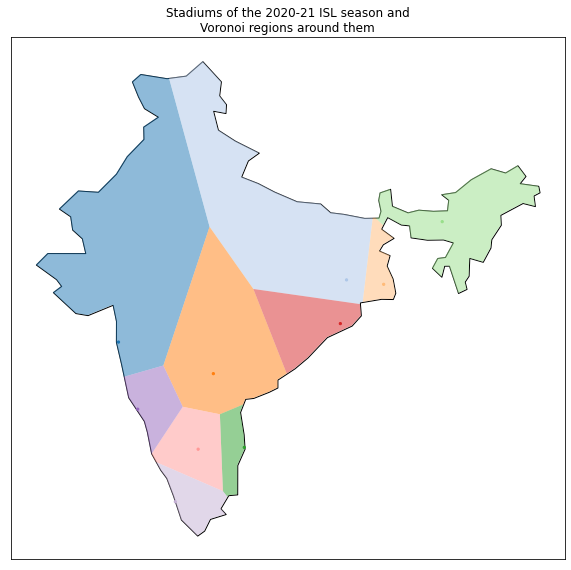

In [50]:
def islStadiumsVoronoi():
    gpd.options.display_precision = 9
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    fin = open("../Data/Stadiums_Data/ISL_202021.pickle", "rb")
    stadiums = pickle.load(fin)
    fin.close()

    india = world[world["name"] == "India"]
    india = india.to_crs(epsg=4326)
    india_boundary = india["geometry"].iloc[0]
    stadiums = stadiums.to_crs(india.crs)
    stadiums = stadiums[stadiums["geometry"].within(india_boundary)]

    stadiums_coords = points_to_coords(stadiums["geometry"])

    poly_shapes, _, poly_to_pt_assignments = voronoi_regions_from_coords(
        stadiums_coords, india_boundary
    )

    fig, ax = subplot_for_map(figsize=[12.8, 9.6])
    plot_voronoi_polys_with_points_in_area(
        ax, india_boundary, poly_shapes, stadiums_coords, poly_to_pt_assignments
    )
    title = "Stadiums of the 2020-21 ISL season and Voronoi regions around them"
    ax.set_title(textwrap.fill(title, 40))
    plt.show()


islStadiumsVoronoi()

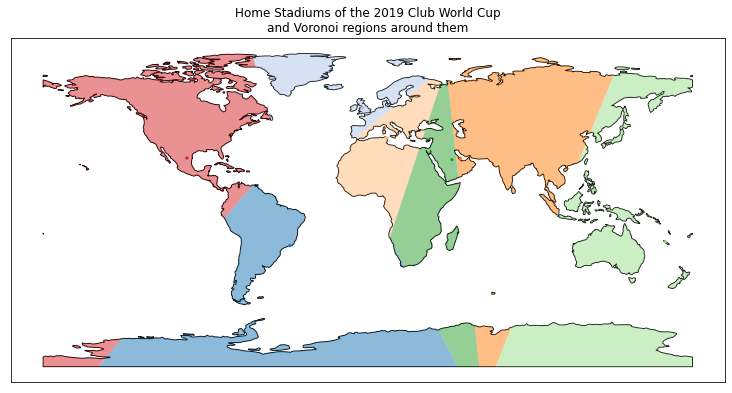

In [66]:
def cwcStadiumsVoronoi():
    gpd.options.display_precision = 9
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    fin = open("../Data/Stadiums_Data/CWC_2019.pickle", "rb")
    stadiums = pickle.load(fin)
    fin.close()

    world = world.to_crs(epsg=4326)
    world_boundary = cascaded_union(world["geometry"])
    stadiums = stadiums.to_crs(world.crs)
    stadiums = stadiums[stadiums["geometry"].within(world_boundary)]

    stadiums_coords = points_to_coords(stadiums["geometry"])

    poly_shapes, _, poly_to_pt_assignments = voronoi_regions_from_coords(
        stadiums_coords, world_boundary
    )

    fig, ax = subplot_for_map(figsize=[12.8, 9.6])
    plot_voronoi_polys_with_points_in_area(
        ax, world_boundary, poly_shapes, stadiums_coords, poly_to_pt_assignments
    )
    title = "Home Stadiums of the 2019 Club World Cup and Voronoi regions around them"
    ax.set_title(textwrap.fill(title, 40))
    plt.show()


cwcStadiumsVoronoi()

In [22]:
def getStadiumsData(stadiums, filename):
    lat = []
    lon = []
    stadiums_coords = []
    url = "https://nominatim.openstreetmap.org/search?format=json&limit=1&q="
    for stadium in stadiums:
        print(stadium)
        req = requests.get(url + stadium).json()[0]
        lat.append(req["lat"])
        lon.append(req["lon"])
    df = pd.DataFrame({"Stadium": stadiums, "Latitude": lat, "Longitude": lon})
    gdf = gpd.GeoDataFrame(
        df, crs=4326, geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"])
    )
    import pickle

    fout = open("../Data/Stadiums_Data/" + filename, "wb")
    pickle.dump(gdf, fout)
    fout.close()

In [ ]:
getStadiumsData(
    [
        "Emirates Stadium, London",
        "Villa Park, Aston",
        "Amex Stadium, Brighton",
        "Turf Moor, Burnley",
        "Stamford Bridge, London",
        "Selhurst Park, London",
        "Goodison Park, Liverpool",
        "Craven Cottage, London",
        "Elland Road, Leeds",
        "King Power Stadium, Leicester",
        "Anfield, Liverpool",
        "Etihad Stadium, Manchester",
        "Old Trafford, Manchester",
        "St James Park, Newcastle",
        "Bramall Lane, Sheffield",
        "St Mary's Stadium, Southampton",
        "Tottenham Hotspur Stadium, London",
        "The Hawthorns, West Bromwich",
        "London Stadium, London",
        "Molineux Stadium, Wolverhampton",
    ],
    "PL_202021.pickle",
)

In [ ]:
getStadiumsData(
    [
        "Allianz Field, Saint Paul",
        "Audi Field, Washington DC",
        "Banc of California Stadium, Los Angeles",
        "BBVA Stadium, Houston",
        "BC Place, Vancouver",
        "BMO Field, Toronto",
        "CenturyLink Field, Seattle",
        "Dick's Sporting Goods Park, Commerce City",
        "Dignity Health Sports Park Soccer Stadium, Carson",
        "Earthquakes Stadium, San Jose",
        "Exploria Stadium, Orlando",
        "Gillette Stadium, Foxborough",
        "Fort Lauderdale, FL",
        "Mapfre Stadium, Columbus",
        "Mercedes Benz Stadium, Atlanta",
        "Nippert Stadium, Cincinnati",
        "Nissan Stadium, Nashville",
        "Providence Park, Portland",
        "Red Bull Arena, Harrison",
        "Rio Tinto Stadium, Sandy",
        "Saputo Stadium, Montreal",
        "Soldier Field, Chicago",
        "Subaru Park, Chester",
        "Toyota Stadium, Frisco",
        "Yankee, Bronx",
        "Children's Mercy Park, Kansas City",
    ],
    "MLS_2020.pickle",
)

In [19]:
getStadiumsData(
    [
        "Stade Raymond Kopa, Angers",
        "Matmut Atlantique, Bordeaux",
        "Stade Francis-Le Blé, Brest",
        "Stade Gaston Gérard, Dijon",
        "Stade Bollaert-Delelis, Lens",
        "Stade Pierre-Mauroy, Lille",
        "Stade du Moustoir, Lorient",
        "Groupama Stadium, Lyon",
        "Plan-de-Cuques, France",  # Marseille
        "Stade Saint-Symphorien, Metz",
        "Stade Louis II, Monaco",
        "Stade de la Mosson, Montpellier",
        "Stade de la Beaujoire, Nantes",
        "Allianz Riviera, Nice",
        "Stade des Costières, Nimes",
        "Parc des Princes, Paris",
        "Stade Auguste Delaune, Reims",
        "Roazhon Park, Rennes",
        "Stade Geoffroy-Guichard, Saint-Étienne",
        "Stade de la Meinau, Strasbourg ",
    ],
    "Ligue_1_202021.pickle",
)

Stade Raymond Kopa, Angers
Matmut Atlantique, Bordeaux
Stade Francis-Le Blé, Brest
Stade Gaston Gérard, Dijon
Stade Bollaert-Delelis, Lens
Stade Pierre-Mauroy, Lille
Stade du Moustoir, Lorient
Groupama Stadium, Lyon
Plan-de-Cuques, France
Stade Saint-Symphorien, Metz
Stade Louis II, Monaco
Stade de la Mosson, Montpellier
Stade de la Beaujoire, Nantes
Allianz Riviera, Nice
Stade des Costières, Nimes
Parc des Princes, Paris
Stade Auguste Delaune, Reims
Roazhon Park, Rennes
Stade Geoffroy-Guichard, Saint-Étienne
Stade de la Meinau, Strasbourg 


In [23]:
getStadiumsData(
    [
        "Thane, Maharashtra",
        "Jamshedpur",
        "Kochi",
        "Chennai",
        "Bangalore",
        "Kolkata",
        "Hyderabad",
        "Guwahati",
        "Goa",
        "Bhubaneswar, Odisha",
    ],
    "ISL_202021.pickle",
)

Thane, Maharashtra
Jamshedpur
Kochi
Chennai
Bangalore
Kolkata
Hyderabad
Guwahati
Goa
Bhubaneswar, Odisha


In [64]:
getStadiumsData(
    [
        "Maracana Stadium, Rio de Janeiro",
        "Anfield, Liverpool",
        "King Saud University Stadium, Riyadh",
        "Stade Olympique de Radès, Tunis",
        "Estadio BBVA, Monterrey",
        "Hienghène",
        "Jassim Bin Hamad Stadium, Doha",
    ],
    "CWC_2019.pickle",
)

Maracana Stadium, Rio de Janeiro
Anfield, Liverpool
King Saud University Stadium, Riyadh
Stade Olympique de Radès, Tunis
Estadio BBVA, Monterrey
Hienghène
Jassim Bin Hamad Stadium, Doha


In [ ]:
getStadiumsData(
    [
        "Maracana Stadium, Rio de Janeiro",
        "Anfield, Liverpool",
        "King Saud University Stadium, Riyadh",
        "Stade Olympique de Radès, Tunis",
        "Estadio BBVA, Monterrey",
        "Hienghène",
        "Jassim Bin Hamad Stadium, Doha",
    ],
    "CWC_2019.pickle",
)